In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

#TODO
- fazer plot da legenda ficar sempre no canto superior esquerdo
- por titulo na legenda dizendo qual variṕavel esta avriando
- pegar chave e valor de valores fixos de forma mais elegante

In [198]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [199]:
results: pd.DataFrame = pd.read_json("data/results.json")

In [200]:
def plot_fixed(hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

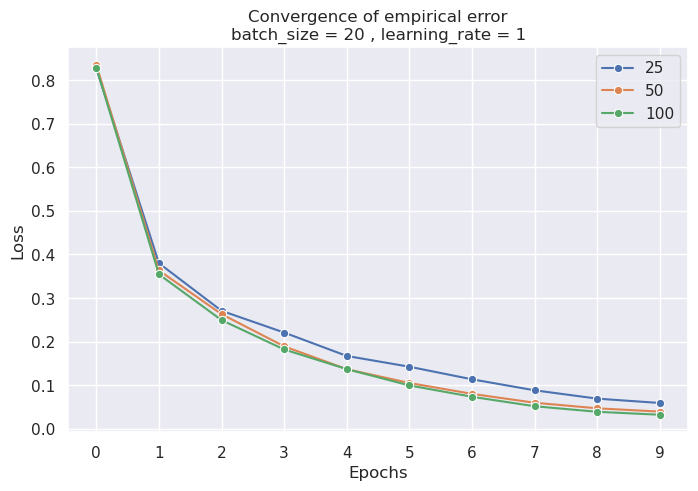

In [206]:
plot_fixed(learning_rate=1, batch_size=20, annotate=False)